<a href="https://colab.research.google.com/github/Kerry-z/awesome-programming-books-1/blob/master/colabs/demo_sdqrcode_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Demo colab for [sdqrcode](https://github.com/koll-ai/stable-diffusion-qrcode), diffusers version

In [ ]:
!pip install sdqrcode[diffusers]
# !pip install git+https://github.com/koll-ai/stable-diffusion-qrcode # install dev build (might be unstable)
!pip install git+https://github.com/huggingface/diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 663.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import sdqrcode
import torch

In [ ]:
generator = sdqrcode.init(torch_dtype=torch.float16)

In [ ]:
# images = generator.generate_sd_qrcode(
#     prompt = "A beautiful minecraft landscape",
#     negative_prompt = ""
#     steps = 30,
#     cfg_scale = 7 ,
#     width = 768,
#     height = 768,
#     seed = -1,
#     controlnet_weights = [0.35, 0.65], # [weight_cn_1, weight_cn_2, ...]
#     controlnet_startstops = [(0,1), (0.35, 0.7)], # [(start_cn_1, end_cn_1), ... ]. (0.35, 0.7) means apply CN after 35% of total steps until 70% of total steps
#     qrcode_text = "https://koll.ai" ,
#     qrcode_error_correction = "high",
#     qrcode_box_size = 10,
#     qrcode_border = 4,
#     qrcode_fill_color = "black",
#     qrcode_back_color = "white",
# )

  0%|          | 0/20 [00:00<?, ?it/s]

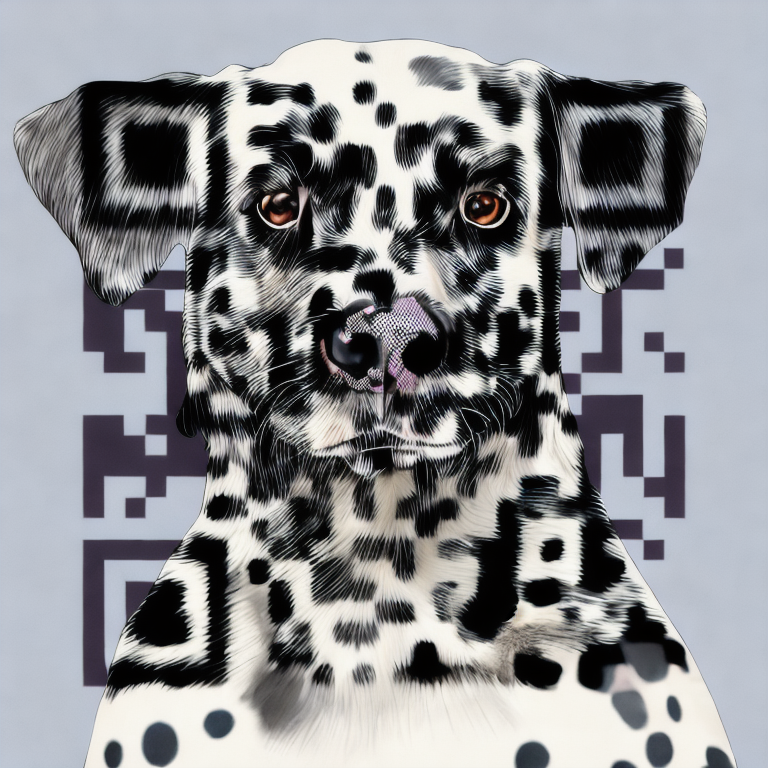

In [ ]:
images = generator.generate_sd_qrcode(prompt="a beautiful dalmatian portrait, front shot")
images[0]


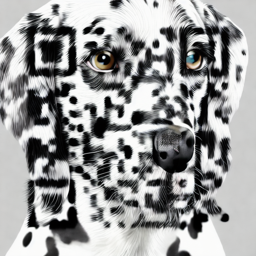

In [ ]:
# Resize for better scan
images[0].resize((256,256))

  0%|          | 0/20 [00:00<?, ?it/s]

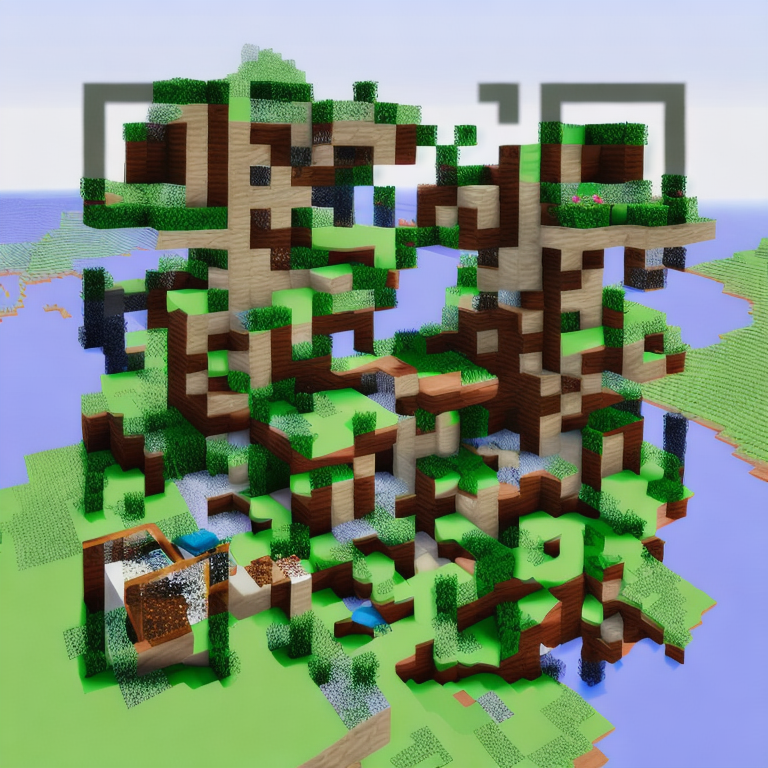

In [ ]:
images = generator.generate_sd_qrcode(prompt="a beautiful minecraft landscape, highly detailed, HD, trending on artstation")
images[0]

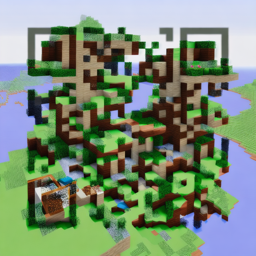

In [ ]:
# Resize for better scan
images[0].resize((256,256))

# Use custom config

In [ ]:
# reset gpu vram
del generator.engine.pipeline
torch.cuda.empty_cache()

Edit the following cell with your args

In [ ]:
%%file config_custom.yaml
global:
  mode: txt2img
  prompt: a beautiful dalmatian portrait, front shot
  negative_prompt: ""
  model_name_or_path: SG161222/Realistic_Vision_V2.0
  steps: 20
  scheduler_name: DPM++ 2M Karras
  cfg_scale: 7
  width: 768
  height: 768
  seed: -1
  batch_size: 1

controlnet_units:
  brightness:
    model: ioclab/control_v1p_sd15_brightness
    cn_input_image: qrcode
    module: none #not implemented yet
    weight: 0.35
    start: 0.0
    end: 1.0

qrcode:
  text: https://koll.ai
  error_correction: high # [low, medium, quart, high]
  box_size: 10
  border: 4
  fill_color: black
  back_color: white

Writing config_custom.yaml


The config attributes {'dropout': 0.0, 'sample_size': 32} were passed to ControlNetModel, but are not expected and will be ignored. Please verify your config.json configuration file.
vae/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

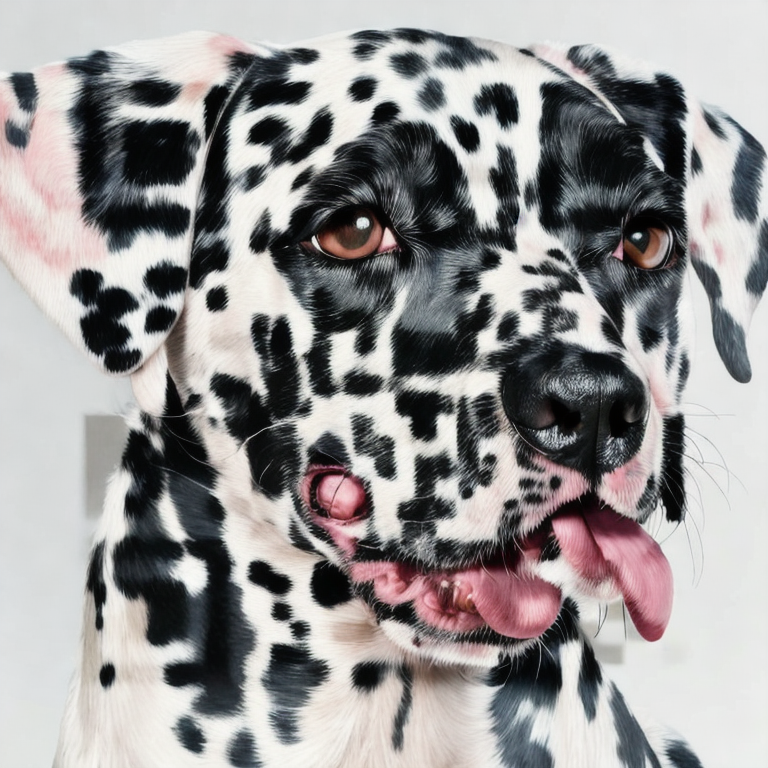

In [ ]:

sd_qr_codes,generator = sdqrcode.init_and_generate_sd_qrcode(
            config_name_or_path="./config_custom.yaml",
        )

sd_qr_codes[0]